# Modelling and forecasting a potential chikungunya outbreak in France, 2025
**Author:** Sandeep Tegar<sup>1, 2</sup> and Dominic P. Brass<sup>1</sup> 

**Contact:** santeg@ceh.ac.uk  
**Date:** 2025-03-17   
**Affiliation:**
1. UK Centre for Ecology & Hydrology, Benson Lane, Wallingford, Oxfordshire, UK
2. School of Mathematics and Statistics, College of Science and Engineering, University of Glasgow, Glasgow, UK   


## Overview  
This notebook contains the code used to simulate chikungunya outbreak in Bernis. It performs model simulation using function `chikungunya()` and seeding using function `seeding_run()`. Finally, it plots the output.  

## Requirements  
- Julia 1.10.0+  
- Required libraries: `Plots`, `DelayDiffEq`, `Dierckx`, `CSV`, `Interpolations`, `QuadGK`, `Statistics`, `Dates`, `DataFrames`, `RecurssiveArrayTools`, `TimeSeries` 
- Data files: `AMgam.csv`, `Car_Tol_1.csv`, `Fin_LSurv.csv`, `LDgam.csv`, `WL_re.csv`
- Function files: DengueFun.jl and ErrorFun.jl
## Extra requirement
1. ERA5 climate data file "43.77_4.29.csv" (format: latitude_longitude.csv) coulmns: time, logitude, latitude, t2m, tp, evaow, where 't2m', 'tp', and 'evaow' stand for  "2m_temperature", "total_precipitation", and "evaporation_from_open_water_surfaces_excluding_oceans", respectively. Source: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land?tab=overview

## Usage  
Save all the required files in the working directory and simply run the cells in order to reproduce the results.  

In [1]:
# Required packages
using Plots, DelayDiffEq, Dierckx, CSV, Interpolations, QuadGK, Statistics, Dates, DataFrames, RecursiveArrayTools, TimeSeries

In [2]:
# call the functions dengue() and seeding_error() from the files DengueFun.jl and ErrorFun.jl
include("ChikungunyaFunSR1.jl")
include("seeding_run.jl")
include("read_case_files.jl")

read_case_files (generic function with 1 method)

In [3]:
# compute daily cases for seeding period
seeding_start = Date("2025-05-21", "yyyy-mm-dd")
seeding_end = Date("2025-06-25", "yyyy-mm-dd")
seeding_run(seeding_start, seeding_end)

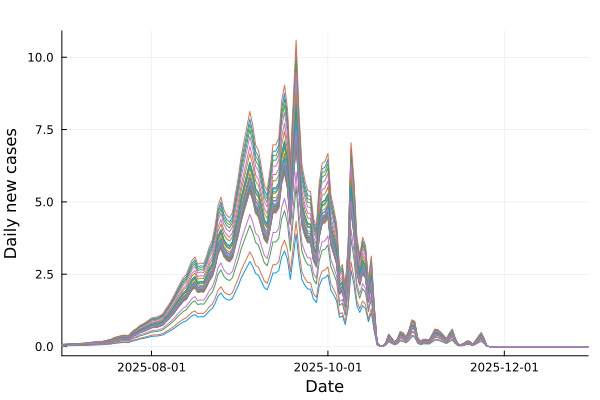

In [5]:
# plotting the output

# read the output files
output = read_case_files(seeding_start, seeding_end);

# number of files
seed_num = length(output)

# plot
plot()  # initialize empty plot

for k in 1:seed_num
    df = output[k]
    plot!(df.time, df.daily_cases, label = "",
    xlims=(Date("2025-07-01"), Date("2025-12-30")))
end

xlabel!("Date")
ylabel!("Daily new cases")
title!(" ")

In [5]:
savefig("outbreak_base_2015.pdf")

"/users/hails/santeg/sandeep/projects/chikungunya_2025/La_Crau_2025/simulation/Y2015/infection/outbreak_base_2015.pdf"